<a href="https://colab.research.google.com/github/asifsundrani/Assignment_3/blob/master/W5__sundrani_qq301451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment for Module 5, Training Models

In this assignment you will train different models on a given data set, and find the one that performs best

### Getting the data for the assignment (similar to the notebook from chapter 2 of Hands-On...)

In [0]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [0]:
fetch_housing_data()

In [0]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [0]:
housing = load_housing_data()

### Fix the categories in the categorical variable

In [0]:
d = {'<1H OCEAN':'LESS_1H_OCEAN', 'INLAND':'INLAND', 'ISLAND':'ISLAND', 'NEAR BAY':'NEAR_BAY', 'NEAR OCEAN':'NEAR_OCEAN'}
housing['ocean_proximity'] = housing['ocean_proximity'].map(lambda s: d[s])

In [6]:
housing['ocean_proximity'].value_counts()

LESS_1H_OCEAN    9136
INLAND           6551
NEAR_OCEAN       2658
NEAR_BAY         2290
ISLAND              5
Name: ocean_proximity, dtype: int64

### Add 2 more features

In [0]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["population_per_household"]=housing["population"]/housing["households"]

### Fix missing data

In [0]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True) 

### Create dummy variables based on the categorical variable

In [0]:
one_hot = pd.get_dummies(housing['ocean_proximity'])
housing = housing.drop('ocean_proximity', axis=1)
housing = housing.join(one_hot)

### Check the data

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
rooms_per_household         20640 non-null float64
population_per_household    20640 non-null float64
INLAND                      20640 non-null uint8
ISLAND                      20640 non-null uint8
LESS_1H_OCEAN               20640 non-null uint8
NEAR_BAY                    20640 non-null uint8
NEAR_OCEAN                  20640 non-null uint8
dtypes: float64(11), uint8(5)
memory usage: 1.8 MB


# ASSIGNMENT

### 1. Partition into train and test

Use train_test_split from sklearn.model_selection to partition the dataset into 70% for training and 30% for testing.

You can use the 70% for training set as both training and validation by using cross-validation.


In [0]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.3,random_state=42)

In [14]:
print('Train Set Size: {}'.format(train_set.shape))
print('Test Set Size: {}'.format(test_set.shape))

Train Set Size: (14448, 16)
Test Set Size: (6192, 16)


### Features

In [15]:
train_set.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'population_per_household',
       'INLAND', 'ISLAND', 'LESS_1H_OCEAN', 'NEAR_BAY', 'NEAR_OCEAN'],
      dtype='object')

In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 7061 to 15795
Data columns (total 16 columns):
longitude                   14448 non-null float64
latitude                    14448 non-null float64
housing_median_age          14448 non-null float64
total_rooms                 14448 non-null float64
total_bedrooms              14448 non-null float64
population                  14448 non-null float64
households                  14448 non-null float64
median_income               14448 non-null float64
median_house_value          14448 non-null float64
rooms_per_household         14448 non-null float64
population_per_household    14448 non-null float64
INLAND                      14448 non-null uint8
ISLAND                      14448 non-null uint8
LESS_1H_OCEAN               14448 non-null uint8
NEAR_BAY                    14448 non-null uint8
NEAR_OCEAN                  14448 non-null uint8
dtypes: float64(11), uint8(5)
memory usage: 1.4 MB


In [0]:
target = 'median_house_value'
features = list(train_set.columns)
features = [f for f in features if f!=target]

In [18]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'INLAND',
 'ISLAND',
 'LESS_1H_OCEAN',
 'NEAR_BAY',
 'NEAR_OCEAN']

In [0]:
X_tr = train_set[features]
y_tr = train_set[[target]]

X_te = test_set[features]
y_te = test_set[[target]]

### 2. Polynomial transformations

Use PolynomialFeatures from sklearn.preprocessing

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit(X_tr)
X_tr = poly.transform(X_tr)
X_te = poly.transform(X_te)

In [21]:
print('X_train: {}'.format(X_tr.shape))
print('X_test: {}'.format(X_te.shape))

X_train: (14448, 136)
X_test: (6192, 136)


##### You should obtain X_tr and X_te with 136 columns each, since originally you had 15 features.

##### With m original features, the new added polynomial features of degree 2 are: $(m^2-m)/2+m+1$. Why?

Each original feature with 2 degree will create an additional new feature (squared valued due to 2 degree) for itself as well as other new features will be created through combination of features with each other. 

##### These, plus the original features gives a total of  $(m^2-m)/2+2m+1$

In [22]:
print("Original number of features: "+str(len(features)))
print("Final number of features: "+str(X_tr.shape[1]))

Original number of features: 15
Final number of features: 136


### 3. Scaling features

Similarly, use StandardScaler from sklearn.preprocessing to normalize the training and testing data, using the training data

In [23]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
standardscaler.fit(X_tr)
standardscaler.transform(X_tr)
standardscaler.transform(X_te)

array([[ 0.        ,  0.28664112,  0.19166399, ..., -0.35549129,
         0.        , -0.37688739],
       [ 0.        ,  0.06196251, -0.23911452, ..., -0.35549129,
         0.        , -0.37688739],
       [ 0.        , -1.42590916,  1.00639726, ...,  2.81300847,
         0.        , -0.37688739],
       ...,
       [ 0.        ,  0.8358555 , -0.92742367, ..., -0.35549129,
         0.        , -0.37688739],
       [ 0.        , -0.84673764,  1.01576201, ..., -0.35549129,
         0.        , -0.37688739],
       [ 0.        ,  0.67109119, -0.70266966, ..., -0.35549129,
         0.        , -0.37688739]])

#### Comparing models

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

### 4. Linear regression on original features (no transformations) --- benchmark

#### Your goal is to find the model that minimizes the rmse score

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(LinearRegression(), train_set[features], train_set[target], scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [70142.55721218 67456.39127204 67318.3258893  70866.26065275]
Mean: 68945.88375656855


In [26]:
housing['median_house_value'].mean()

206855.81690891474

Average mean value of a house is ~206K and algorithm is expected error value around $69K which is 30% error rate vs average value.

### 5. Linear regression  (on transformed features: polynomial transformation + scaling)

Now do as in 4 but with the original and transformed features (136 features)

In [27]:
lin_scores_poly = cross_val_score(LinearRegression(), X_tr, y_tr, scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores_poly = np.sqrt(-lin_scores_poly)
display_scores(lin_rmse_scores_poly)

Scores: [156464.60737035 318473.00461362 540465.35062476 153497.75444352]
Mean: 292225.17926306237


If the error on the cross-validation is too high it is because the model is over-fitting. Regularization is needed.

Error rate is vey high with and  without polynomial features. This means that model is overfitting(high variance) after adding polynomial transformation.

### 6. Ridge regression

In [29]:
from sklearn.linear_model import Ridge
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,10000]}] #  there are 2 1000 alpha so changed one of them to 10000
grid_search_rr = GridSearchCV(Ridge(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_rr.fit(X_tr, y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43477e-23): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18967e-23): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.48051e-23): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67436e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20449e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarni

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                    10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [30]:
print(grid_search_rr.best_params_)
print(np.sqrt(-grid_search_rr.best_score_))

{'alpha': 1000}
104583.65011645321


The best score is very high in ridge regression that means the model is not generalizing well in cross validation model which means it is overfitting.

### 7. Lasso regression

Now do the same as in 6 but with Lasso

In [0]:
from sklearn.linear_model import Lasso 
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,10000]}] # there are 2 1000 alpha so changed one of them to 10000
grid_search_lasso = GridSearchCV(Lasso(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_tr, y_tr) 


In [32]:
print(grid_search_lasso.best_params_)
print(np.sqrt(-grid_search_lasso.best_score_))

{'alpha': 1000}
76650.4602949992


Lasso result is better than Ridge but higher than without polynomial feature linear regression analysis.

### 8. Elastic Net regression

Do the same as in 6 and 7, but now with Elastic Net. However, the grid search should be over the parameters alpha and  l 1ratio. Use just 3 values for l1_ratio.

In [37]:
from sklearn.linear_model import ElasticNet
param_grid_enr = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,10000],'l1_ratio':[0.25,0.5,0.75]}]
grid_search_enr = GridSearchCV(ElasticNet(), param_grid_enr, cv=3, scoring='neg_mean_squared_error')
grid_search_enr.fit(X_tr, y_tr) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18997732106762.81, tolerance: 12920909585.48827
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19014240936785.746, tolerance: 12904473489.569967
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18668037293855.164, tolerance: 12886300597.558662
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189994779106

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                          'l1_ratio': [0.25, 0.5, 0.75]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [38]:
print(grid_search_enr.best_params_)
print(np.sqrt(-grid_search_enr.best_score_))

{'alpha': 1, 'l1_ratio': 0.75}
68805.84612165812


### Evaluating your best model on TESTING data

Choose among grid_search_rr, grid_search_lr, and grid_search_enr, the model with best performance

Elastic error rate is the lowest among the three options. Therefore I would Elastic best grid for test data evaluation.

In [42]:
from sklearn.metrics import mean_squared_error

final_model = grid_search_enr.best_estimator_   ## grid_search SHOULD BE THE BEST GRID SEARCH ##


y_te_estimation = final_model.predict(X_te)

final_mse = mean_squared_error(y_te, y_te_estimation)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

67163.03271226355


The result of test data is very close to train result which means the model is peforming well in the test data set.

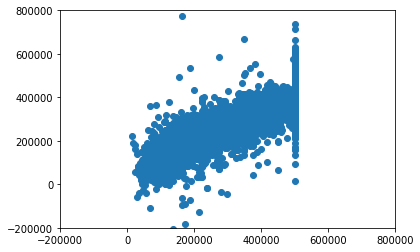

In [43]:
import matplotlib.pyplot as plt

plt.scatter(x=y_te, y=y_te_estimation)
plt.xlim([-200000,800000])
plt.ylim([-200000,800000])
plt.show()

### Question: Before you computed the final_rmse on the test data, what was your expected value for this quantity? Does your best model have high variance?

I expected lower value in elastic net versus original model without polynomial features(original).
As the test result is closer to elastic predicted value on train data set therefore test data doesn't have high variance.

##### YOUR ANSWER HERE 

#[Optional]
Why does the matrix X appears transponsed in the normal equation in the linear regression? Equation 4.4. Start from equation 4.3



X is matrices i.e. m by n and y is a vector i.e. m by 1. In vectorization X*y won't function as X columns should match with y rows. Therefore X needs transpose which will create X^T i.e. n by m. In vectorization column of first function should be equal to row of second function.

#[Optional]
Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?



No. Depends various factors e.g. learning rate as well as type of model e.g. stochastic vs batch vs mini batch

#[Optional]
Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?



No because it will erratic less than stockastic and will reach global minimum but will not settledown completely as Batch GD.

#[Optional]
Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?



When training error and validation error are close to each other and high then it will be considered as high bias or underfitting. For this scenario in ridge regression learning rate needs to go up.

#[Optional]
Why does the matrix X appears transponsed in the normal equation in the linear regression? Equation 4.4. Start from equation 4.3

